# HW2 Python Lab: Log-Transformation of Stock Prices
In the analysis of stock prices, it is typically more relevant to measure returns rather than prices directly. A widely used method to obtain a more natural scale in stock prices is to transform the
time series using the log-return between consecutive prices, defined as: $Y_k^{'} = \log ( Y_k / Y_{k-1})$

[*********************100%***********************]  1 of 1 completed


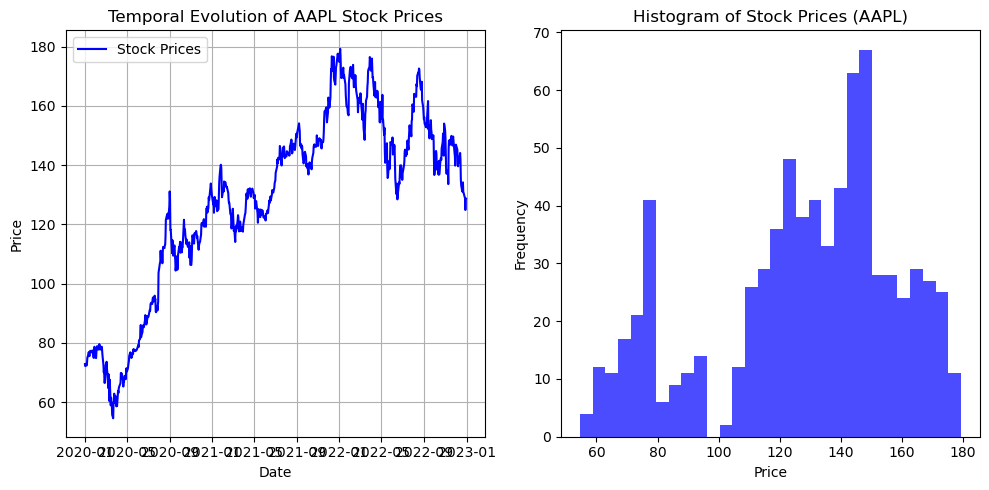

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Download historical stock data (e.g. , for Apple stock ’AAPL ’)
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
# Extract adjusted closing prices
prices = stock_data['Adj Close']

plt.figure(figsize=(10, 5))

# Subplot 1: Temporal evolution of AAPL stock prices
plt.subplot(1, 2, 1)
plt.plot(prices, label='Stock Prices', color='blue')
plt.title('Temporal Evolution of AAPL Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()

# Subplot 2: Histogram of AAPL stock prices
plt.subplot(1, 2, 2)
plt.hist(prices, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Stock Prices (AAPL)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



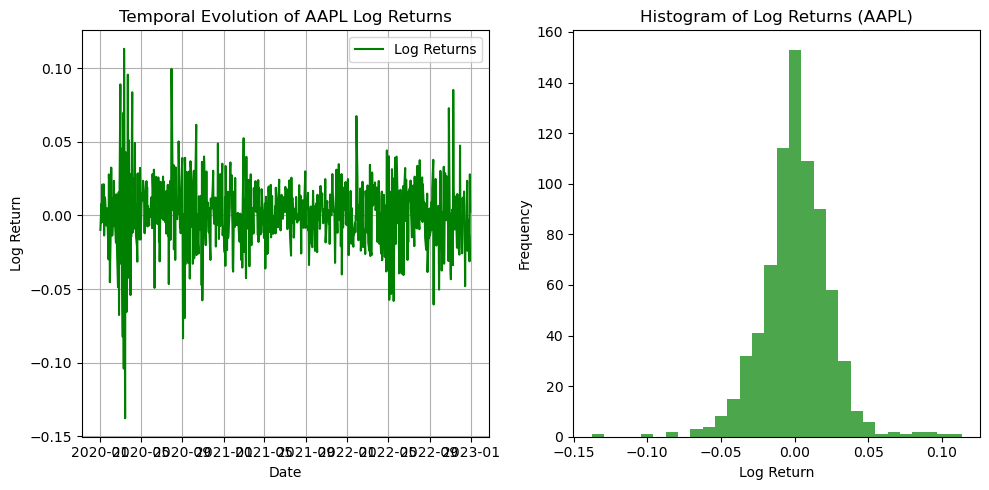

In [3]:


# Compute log returns (log ratio transformation )
log_returns = np.log(prices / prices.shift(1)).dropna()

plt.figure(figsize=(10, 5))

# Subplot 1: Temporal evolution of log returns
plt.subplot(1, 2, 1)
plt.plot(log_returns, label='Log Returns', color='green')
plt.title('Temporal Evolution of AAPL Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.legend()

# Subplot 2: Plot histogram of log returns
plt.subplot(1, 2, 2)
plt.hist(log_returns, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Log Returns (AAPL)')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test
adf, p_value, _, _,critical_values, _= adfuller(log_returns)

print(f'ADF Statistic: {adf}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

if p_value < 0.05:
    print("The log returns are stationary (reject the null hypothesis of unit root).")
else:
    print("The log returns are not stationary (fail to reject the null hypothesis of unit root).")

ADF Statistic: -8.749390973803425
p-value: 2.8638790488670384e-14
Critical Values:
   1%: -3.439146171679794
   5%: -2.865422101274577
   10%: -2.568837245865348
The log returns are stationary (reject the null hypothesis of unit root).
